In [1]:
%matplotlib inline

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.datasets import fetch_california_housing, load_digits, load_iris

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder, PolynomialFeatures, LabelBinarizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.metrics import roc_curve, auc

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.utils import shuffle

# Model Training and Improvement

In [3]:
EPS = 1e-10

dataset: https://www.kaggle.com/datasets/brandao/diabetes

In [4]:
diabetic_data = pd.read_csv("diabetic_data.csv")
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabetic_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
diabetic_data.columns[diabetic_data.columns.str.contains("_id")]

Index(['encounter_id', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id'],
      dtype='object')

In [7]:
diabetic_data.pioglitazone.unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [8]:
diabetic_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [9]:
pd.get_dummies(diabetic_data, drop_first = True)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted_>30,readmitted_NO
0,2278392,8222157,6,25,1,1,41,0,1,0,...,False,False,False,False,False,False,True,False,False,True
1,149190,55629189,1,1,7,3,59,0,18,0,...,False,False,False,False,False,False,False,True,True,False
2,64410,86047875,1,1,7,2,11,5,13,2,...,False,False,False,False,False,False,True,True,False,True
3,500364,82442376,1,1,7,2,44,1,16,0,...,False,False,False,False,False,False,False,True,False,True
4,16680,42519267,1,1,7,1,51,0,8,0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,...,False,False,False,False,False,False,False,True,True,False
101762,443847782,74694222,1,4,5,5,33,3,18,0,...,False,False,False,False,False,False,True,True,False,True
101763,443854148,41088789,1,1,7,1,53,0,9,1,...,False,False,False,False,False,False,False,True,False,True
101764,443857166,31693671,2,3,7,10,45,2,21,0,...,False,False,False,False,False,False,False,True,False,True


In [10]:
pd.get_dummies(diabetic_data, drop_first = True).dtypes

encounter_id                     int64
patient_nbr                      int64
admission_type_id                int64
discharge_disposition_id         int64
admission_source_id              int64
                                 ...  
metformin-pioglitazone_Steady     bool
change_No                         bool
diabetesMed_Yes                   bool
readmitted_>30                    bool
readmitted_NO                     bool
Length: 2436, dtype: object

In [11]:
diabetes_attributes = diabetic_data.drop(columns = 'readmitted')
target = diabetic_data.readmitted

In [12]:
diabetes_attributes_dummies = pd.get_dummies(diabetes_attributes)

In [13]:
logistic_regression = LogisticRegression()

In [14]:
logistic_regression.fit(diabetes_attributes_dummies, target)

LogisticRegression()

In [15]:
logistic_regression.coef_

array([[-3.31701395e-09, -3.86905107e-09, -1.15814534e-15, ...,
        -3.26369841e-16, -1.63318872e-16, -3.02903976e-16],
       [-1.50329991e-10,  4.51003945e-09, -1.47130836e-16, ...,
        -1.14848644e-16, -1.11876233e-16,  7.41720589e-17],
       [ 3.46734394e-09, -6.40988385e-10,  1.30527618e-15, ...,
         4.41218484e-16,  2.75195106e-16,  2.28731917e-16]])

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit_transform(diabetes_attributes_dummies)

array([[5.10498143e-03, 4.33874102e-02, 7.14285714e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.07911576e-04, 2.93553165e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.16903122e-04, 4.54071832e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99970544e-01, 2.16823828e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99977344e-01, 1.67246019e-01, 1.42857143e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.25735491e-01, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [18]:
diabetes_attribites_scaled = scaler.fit_transform(diabetes_attributes_dummies)

In [19]:
logistic_regression.fit(diabetes_attribites_scaled, target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
logistic_regression.score(diabetes_attribites_scaled, target)

0.5951693099856533

In [21]:
logistic_regression.score(diabetes_attributes_dummies, target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.5387162706601419

<b>Pipleine</b>

In [22]:
pipeline = Pipeline({
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression())
})

In [23]:
pipeline

Pipeline(steps={('scaler', MinMaxScaler()), ('model', LogisticRegression())})

In [24]:
sample_data = diabetic_data.sample(5000, random_state = 42)

In [25]:
pd.get_dummies(sample_data)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
35956,110939484,19274094,1,1,6,11,68,0,20,0,...,True,True,True,False,True,False,True,False,False,True
60927,170328306,65634327,1,1,1,1,20,0,7,0,...,True,True,True,False,True,False,True,False,False,True
79920,245688426,100657359,3,6,1,4,21,3,23,1,...,True,True,True,False,True,False,True,False,False,True
50078,150826224,83144448,2,1,1,12,28,0,19,0,...,True,True,True,False,True,False,True,False,True,False
44080,135993852,65234214,1,2,7,1,21,0,6,0,...,True,True,True,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35562,110096790,33502212,6,1,7,12,65,2,19,0,...,True,True,True,True,False,False,True,False,False,True
98563,402583472,141357506,7,3,7,6,61,1,14,0,...,True,True,True,False,True,False,True,False,False,True
88066,282442506,45759951,1,1,7,3,28,6,6,0,...,True,True,True,False,True,False,True,False,False,True
55955,161139018,112510251,5,1,1,3,27,0,10,1,...,True,True,True,True,False,False,True,False,False,True


In [26]:
pd.get_dummies(sample_data).dtypes

encounter_id                int64
patient_nbr                 int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
                            ...  
diabetesMed_No               bool
diabetesMed_Yes              bool
readmitted_<30               bool
readmitted_>30               bool
readmitted_NO                bool
Length: 1255, dtype: object

In [27]:
pd.get_dummies(sample_data).astype(int)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
35956,110939484,19274094,1,1,6,11,68,0,20,0,...,1,1,1,0,1,0,1,0,0,1
60927,170328306,65634327,1,1,1,1,20,0,7,0,...,1,1,1,0,1,0,1,0,0,1
79920,245688426,100657359,3,6,1,4,21,3,23,1,...,1,1,1,0,1,0,1,0,0,1
50078,150826224,83144448,2,1,1,12,28,0,19,0,...,1,1,1,0,1,0,1,0,1,0
44080,135993852,65234214,1,2,7,1,21,0,6,0,...,1,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35562,110096790,33502212,6,1,7,12,65,2,19,0,...,1,1,1,1,0,0,1,0,0,1
98563,402583472,141357506,7,3,7,6,61,1,14,0,...,1,1,1,0,1,0,1,0,0,1
88066,282442506,45759951,1,1,7,3,28,6,6,0,...,1,1,1,0,1,0,1,0,0,1
55955,161139018,112510251,5,1,1,3,27,0,10,1,...,1,1,1,1,0,0,1,0,0,1


In [28]:
sample_attributes = sample_data.drop(columns = 'readmitted')
sample_target = sample_data.readmitted

In [29]:
sample_attributes = pd.get_dummies(sample_attributes)

In [30]:
# pipeline.fit(sample_attributes, sample_target)

<b>OneHotEncoder</b>

In [31]:
ohe = OneHotEncoder()

In [32]:
ohe.fit(sample_attributes)

OneHotEncoder()

In [33]:
ohe.feature_names_in_

array(['encounter_id', 'patient_nbr', 'admission_type_id', ...,
       'change_No', 'diabetesMed_No', 'diabetesMed_Yes'], dtype=object)

In [34]:
ohe.categories_

[array([   325848,   1139226,   1212006, ..., 443730002, 443775086,
        443824292], dtype=int64),
 array([    10827,     15849,     27315, ..., 186774602, 187042703,
        189502619], dtype=int64),
 array([1, 2, 3, 5, 6, 7, 8], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 17, 18, 22, 23,
        24, 25, 28], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  9, 17, 20], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  

<b>ColumnTransformer</b>

In [35]:
sample_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [36]:
sample_data.dtypes[sample_data.dtypes == np.object_]

race                        object
gender                      object
age                         object
weight                      object
payer_code                  object
medical_specialty           object
diag_1                      object
diag_2                      object
diag_3                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin             

In [37]:
sample_data.dtypes[sample_data.dtypes == np.object_].index

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [38]:
sample_data.dtypes[sample_data.dtypes == np.object_].index.values

array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
       'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'], dtype=object)

In [39]:
categorical_columns = sample_data.dtypes[sample_data.dtypes == np.object_].index.values

In [40]:
categorical_columns

array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
       'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'], dtype=object)

In [41]:
categorical_columns = categorical_columns[:-1]

In [42]:
numerical_columns = sample_data.dtypes[sample_data.dtypes != np.object_].index.values
numerical_columns

array(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'], dtype=object)

In [43]:
numerical_columns = [
    'admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

In [44]:
preprocessor = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_columns),
    ('numerical', MinMaxScaler(), numerical_columns),
], remainder = 'passthrough') # remainder = passthrough -> the rest stay in the analysis; drop -> the rest are dropped

In [45]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical', OneHotEncoder(),
                                 array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazon...
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'], dtype=object)),
                                ('numerical', MinMaxScaler(),
                                 ['admission_type_id',
                                  'discharge_disposition_id',
                                  'time_in_hospital', 'num_lab_procedures',
                                  'num_procedures', 'num_medications',
                                  'number_outpatient', 'number_emergency',
                                  'number_inpatient', 'number_diagnoses'])])

In [46]:
log_transformer = FunctionTransformer(np.log10)

In [47]:
number_processor = Pipeline([
    ('log_transformer', FunctionTransformer(lambda x: np.log10(x + EPS))),
    ('minmax', MinMaxScaler((-5, 5)))
])

In [48]:
number_processor

Pipeline(steps=[('log_transformer',
                 FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                ('minmax', MinMaxScaler(feature_range=(-5, 5)))])

In [49]:
preprocessor = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_columns),
    ('numerical', number_processor, numerical_columns),
])

In [50]:
preprocessor

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acar...
                                 Pipeline(steps=[('log_transformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                 ('minmax',
                                                  MinMaxScaler(feature_range=(-5,
                                                                              5)))]),
                                 ['admission_type_id',
                                  'discharge_disposition_id',
                                  'time_in_hospital', 'num_lab_procedures',
                                  'num_procedures', 'num_medications',
                                  'number_outpatient', 'number_emergency',
                                  'number_inpatient', 'number_diagnoses'])])

In [51]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [52]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression())])

In [53]:
pipeline.steps[0]

('preprocessor',
 ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
        'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
        'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
        'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
        'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
        'acar...
                                  Pipeline(steps=[('log_transformer',
                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                  ('minmax',
                                                   MinMaxScaler(feature_range=(-5,
                                                                               5)))]),
                                  ['admission_type_id',
                                   'discharge_dispos

In [54]:
pipeline.steps[0][1]

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acar...
                                 Pipeline(steps=[('log_transformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                 ('minmax',
                                                  MinMaxScaler(feature_range=(-5,
                                                                              5)))]),
                                 ['admission_type_id',
                                  'discharge_disposition_id',
                                  'time_in_hospital', 'num_lab_procedures',
                                  'num_procedures', 'num_medications',
                                  'number_outpatient', 'number_emergency',
                                  'number_inpatient', 'number_diagnoses'])])

In [55]:
sample_attributes = sample_data.drop(columns = 'readmitted')
sample_target = sample_data.readmitted

In [56]:
pipeline.fit(sample_attributes, sample_target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression())])

In [57]:
pipeline.score(sample_attributes, sample_target)

0.631

# Pickle

In [58]:
pickle.dump(logistic_regression, open("prediction_pipelin.pkl", "wb"))

Pipeline methods

In [59]:
pipeline.steps[0][1].feature_names_in_

array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'], dtype=object)

In [60]:
pipeline.predict(sample_data.sample(10))

array(['NO', '>30', '<30', '>30', 'NO', '>30', 'NO', '>30', '>30', '<30'],
      dtype=object)

# From the begining....

In [61]:
diabetic_data = pd.read_csv('diabetic_data.csv')

In [62]:
sample_data = diabetic_data.sample(5000, random_state = 42) 
attributes = sample_data.drop(columns = ['readmitted'])
target = sample_data.readmitted

In [63]:
pipeline.fit(attributes, target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression())])

<b> Bias-Variance Tradeoff </b>

High bias -> Underfitting

High variance -> Overfitting

Regularization (L1, L2) -> a method for finding a good bias-variance tradeoff

Lasso() -> L1

Ridge() -> L2

ElasticNet() -> L1 + L2

ElasticNet(alpha = 1.5, l1_ratio = 4) -> L1 = 6, L2 = 1.5

LogisticRegression(penalty = None, C = 1e10) # penalty = None -> No regularization; C -> inverse of regularization trength; smaller values -> stronger regularization C = 1 / lambda 

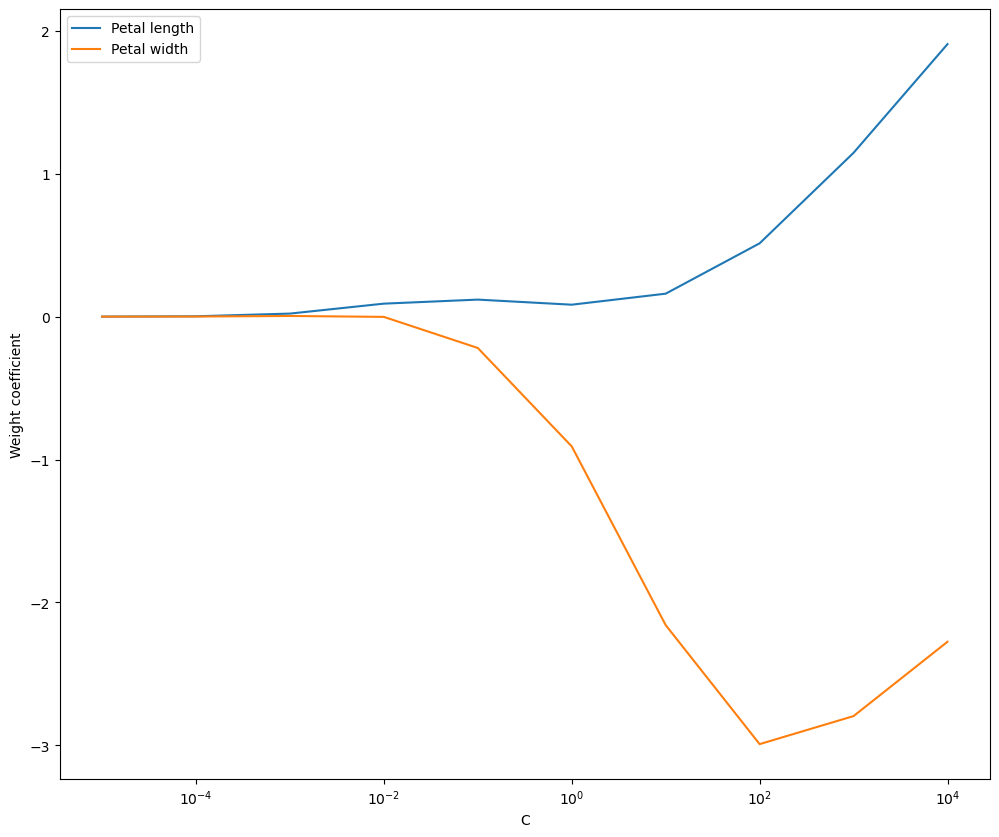

In [64]:
iris = load_iris()
attributes, labels = iris.data[:, [2, 3]], iris.target
weights, params = [], []
for c in np.arange(-5, 5):
    model = LogisticRegression(C = 10.0 ** c)
    model.fit(attributes, labels)
    weights.append(model.coef_[1]) # Display only the second class
    params.append(10.0 ** c)

weights = np.array(weights)

plt.figure(figsize=(12, 10))
plt.plot(params, weights[:, 0], label = "Petal length")
plt.plot(params, weights[:, 1], label = "Petal width")
plt.xlabel("C")
plt.ylabel("Weight coefficient")
plt.xscale("log")
plt.legend()
plt.show()

In [65]:
pipeline["classifier"]

LogisticRegression()

In [66]:
pipeline["classifier"].coef_

array([[-0.5900822 ,  0.03733785,  0.01912985, ...,  0.00845331,
         0.0389343 , -0.02889536],
       [ 0.1641884 ,  0.03653145,  0.02655755, ...,  0.02468741,
         0.02157231,  0.06876218],
       [ 0.4258938 , -0.07386929, -0.04568741, ..., -0.03314072,
        -0.06050661, -0.03986682]])

<b>C -> different values</b>

In [67]:
sample_data = diabetic_data.sample(5000, random_state = 42) 
attributes = sample_data.drop(columns = ['readmitted'])
target = sample_data.readmitted

C = 0.00001

In [68]:
pipeline_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C = 0.00001))
])

In [69]:
pipeline_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1e-05))])

In [70]:
pipeline_reg.fit(attributes, target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1e-05))])

In [71]:
pipeline_reg["classifier"].coef_

array([[-7.70304176e-05,  2.40191883e-05, -6.43139723e-06, ...,
         1.48738960e-03,  6.40245446e-03,  9.88709684e-04],
       [-1.29682046e-04, -8.78675102e-05, -2.00445301e-05, ...,
         4.88720260e-03,  9.85027467e-03,  2.75205291e-03],
       [ 2.06712464e-04,  6.38483219e-05,  2.64759273e-05, ...,
        -6.37459219e-03, -1.62527291e-02, -3.74076260e-03]])

C = 0.0000001

In [72]:
pipeline_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C = 0.0000001))
])

In [73]:
pipeline_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1e-07))])

In [74]:
pipeline_reg.fit(attributes, target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1e-07))])

In [75]:
pipeline_reg["classifier"].coef_

array([[-7.87733650e-07,  3.01535388e-07, -7.34745186e-08, ...,
         1.79194516e-05,  7.65992929e-05,  1.09701098e-05],
       [-1.36935218e-06, -6.27332564e-07, -2.42707588e-07, ...,
         6.63136372e-05,  1.51864729e-04,  3.15741567e-05],
       [ 2.15708583e-06,  3.25797176e-07,  3.16182107e-07, ...,
        -8.42330888e-05, -2.28464022e-04, -4.25442665e-05]])

C = 1000

In [76]:
pipeline_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C = 1000))
])

In [77]:
pipeline_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1000))])

In [78]:
pipeline_reg.fit(attributes, target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1000))])

In [79]:
pipeline_reg["classifier"].coef_

array([[-0.67245944,  0.05137782,  0.02348574, ...,  0.00844244,
         0.03787429, -0.06042575],
       [ 0.20879516,  0.02462764,  0.03302605, ...,  0.02131141,
         0.02069874,  0.08594897],
       [ 0.46366428, -0.07600546, -0.0565118 , ..., -0.02975385,
        -0.05857304, -0.02552322]])

# Training and Testing Sets

Never test the model on the data used for training!

![proportions test/train split](proportions_train_test_datasets.png)

In [80]:
train_test_split(attributes)

[       encounter_id  patient_nbr             race  gender      age     weight  \
 83762     262928076     50158341        Caucasian  Female  [60-70)          ?   
 96139     371410346     40555458        Caucasian  Female  [80-90)          ?   
 6770       33045894     90030123        Caucasian    Male  [80-90)          ?   
 62165     173292900     92088558        Caucasian  Female  [70-80)          ?   
 81350     251968326     32924232        Caucasian    Male  [70-80)          ?   
 ...             ...          ...              ...     ...      ...        ...   
 87547     279689484     53551053        Caucasian  Female  [50-60)          ?   
 31670     101537094     38785977        Caucasian    Male  [50-60)  [125-150)   
 57661     164263668     43669125        Caucasian    Male  [50-60)          ?   
 18873      67857558     13377636  AfricanAmerican    Male  [50-60)          ?   
 53627     157133076    105581016        Caucasian    Male  [40-50)          ?   
 
        admiss

In [81]:
type(train_test_split(attributes))

list

In [82]:
len(train_test_split(attributes))

2

A list with two elements.

In [83]:
train_test_split(attributes, shuffle = False)[0] # training dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
35956,110939484,19274094,Caucasian,Female,[70-80),?,1,1,6,11,...,No,No,Steady,No,No,No,No,No,No,Yes
60927,170328306,65634327,Caucasian,Male,[50-60),?,1,1,1,1,...,No,No,No,No,No,No,No,No,No,Yes
79920,245688426,100657359,Caucasian,Female,[60-70),?,3,6,1,4,...,No,No,No,No,No,No,No,No,No,Yes
50078,150826224,83144448,Caucasian,Male,[30-40),?,2,1,1,12,...,No,No,No,No,No,No,No,No,No,Yes
44080,135993852,65234214,AfricanAmerican,Female,[60-70),?,1,2,7,1,...,No,No,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73144,215564346,38813994,Caucasian,Male,[40-50),?,2,1,7,5,...,No,No,Steady,No,No,No,No,No,No,Yes
53901,157608888,39378078,?,Male,[50-60),?,2,2,7,6,...,No,No,Up,No,No,No,No,No,Ch,Yes
19200,68670276,17323416,Caucasian,Male,[70-80),?,1,1,7,4,...,No,No,No,No,No,No,No,No,No,No
88233,283022106,44065548,Caucasian,Male,[70-80),?,3,1,1,3,...,No,No,No,No,No,No,No,No,No,No


In [84]:
train_test_split(attributes, shuffle = False)[1] # testing dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
82541,257201796,91061784,Caucasian,Male,[50-60),?,2,2,1,1,...,No,No,Steady,No,No,No,No,No,No,Yes
46020,142062312,104174568,Caucasian,Male,[50-60),?,2,1,7,3,...,No,No,Steady,No,No,No,No,No,No,Yes
896,6907530,4327020,Caucasian,Male,[30-40),?,1,1,7,4,...,No,No,Up,No,No,No,No,No,Ch,Yes
71795,209008992,42522120,Caucasian,Male,[70-80),?,3,1,1,5,...,No,No,No,No,No,No,No,No,Ch,Yes
38224,118802358,24289218,Caucasian,Male,[70-80),?,3,22,1,4,...,No,No,No,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35562,110096790,33502212,Caucasian,Male,[50-60),?,6,1,7,12,...,No,No,Down,No,No,No,No,No,Ch,Yes
98563,402583472,141357506,AfricanAmerican,Male,[50-60),?,7,3,7,6,...,No,No,Steady,No,No,No,No,No,No,Yes
88066,282442506,45759951,Caucasian,Female,[40-50),?,1,1,7,3,...,No,No,No,No,No,No,No,No,No,Yes
55955,161139018,112510251,Caucasian,Female,[40-50),?,5,1,1,3,...,No,No,Up,No,No,No,No,No,Ch,Yes


shuffle = False -> eliminates the schuffling of the data

In [85]:
train_test_split(attributes, target)

[        encounter_id  patient_nbr             race  gender      age    weight  \
 101327     437920694    142180205        Caucasian  Female  [60-70)         ?   
 99444      413257316     94037994        Caucasian  Female  [60-70)  [75-100)   
 88411      284202834     39571128  AfricanAmerican    Male  [40-50)         ?   
 15614       59718246     20188206        Caucasian  Female  [70-80)         ?   
 98274      398544860     44315613        Caucasian  Female  [60-70)         ?   
 ...              ...          ...              ...     ...      ...       ...   
 81917      254604390     86365773        Caucasian  Female  [70-80)         ?   
 71920      209343360     51480045  AfricanAmerican  Female  [60-70)         ?   
 101159     435588626    106053408        Caucasian    Male  [70-80)         ?   
 25894       85885002       380808        Caucasian    Male  [50-60)         ?   
 15346       58994628      2653515        Caucasian  Female  [70-80)         ?   
 
         admis

In [86]:
len(train_test_split(attributes, target))

4

In [87]:
attributes_train, attributes_test, target_train, target_test = train_test_split(attributes, target)

In [88]:
attributes_train.shape, attributes_test.shape, target_train.shape, target_test.shape

((3750, 49), (1250, 49), (3750,), (1250,))

train_size, test_size

In [89]:
attributes_train, attributes_test, target_train, target_test = train_test_split(attributes, target, test_size = 1000)

In [90]:
attributes_train.shape, attributes_test.shape, target_train.shape, target_test.shape

((4000, 49), (1000, 49), (4000,), (1000,))

In [91]:
attributes_train, attributes_test, target_train, target_test = train_test_split(attributes, target, test_size = 0.1)

In [92]:
attributes_train.shape, attributes_test.shape, target_train.shape, target_test.shape

((4500, 49), (500, 49), (4500,), (500,))

In [93]:
attributes_train, attributes_test, target_train, target_test = train_test_split(attributes, target, test_size = 0.18)

In [94]:
attributes_train.shape, attributes_test.shape, target_train.shape, target_test.shape

((4100, 49), (900, 49), (4100,), (900,))

stratify -> the proportions of the groups are preserved in the train and test samples

In [95]:
attributes_train, attributes_test, target_train, target_test = train_test_split(attributes, target, test_size = 0.18, random_state = 42, stratify = target)

In [96]:
attributes_train.shape, attributes_test.shape, target_train.shape, target_test.shape

((4100, 49), (900, 49), (4100,), (900,))

In [97]:
target.value_counts(normalize = True) # normalize = True -> proportions, percentages

readmitted
NO     0.5346
>30    0.3514
<30    0.1140
Name: proportion, dtype: float64

In [98]:
target_train.value_counts(normalize = True)

readmitted
NO     0.534634
>30    0.351463
<30    0.113902
Name: proportion, dtype: float64

In [99]:
target_test.value_counts(normalize = True)

readmitted
NO     0.534444
>30    0.351111
<30    0.114444
Name: proportion, dtype: float64

# Evaluating Model Performance

In [100]:
pipeline.fit(attributes_train, target_train)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression())])

In [101]:
pipeline.score(attributes_train, target_train)

0.6407317073170732

In [102]:
# pipeline.score(attributes_test, target_test) 
# it does not pass, because there are such data in the test sample that are not used in the training process 
# and the model does not know what to do with them 

<b>classification_report</b>

In [103]:
print(classification_report(target_train, pipeline.predict(attributes_train)))

              precision    recall  f1-score   support

         <30       0.49      0.16      0.24       467
         >30       0.60      0.52      0.55      1441
          NO       0.67      0.82      0.74      2192

    accuracy                           0.64      4100
   macro avg       0.59      0.50      0.51      4100
weighted avg       0.62      0.64      0.62      4100



<b>Confusion matrix (error matrix)</b>

![proportions test/train split](confussion_matrix.png)


    Accuracy: the number of correctly classified observations.
    accuracy = TP + TN / TP + TN + FP + FN

    Precision: the ratio of correctly predicted positive observations to the total predicted positives i.e. how many of the instances the model labeled as positive are actually positive.
    precision = TP / (TP + FP)

    Recall: the ratio of correctly predicted positive observations to all the observations in the actual class.
    recall = TP / (TP + FN)

    F1 Score: the harmonic mean of Precision and Recall. It gives a balanced measure that considers both false positives and false negatives. 
    F1 Score = 2 x (Precision X Recall) / (Precision + Recall)

    Support: the number of actual occurrences of each class in the dataset. It is simply the count of the true instances for each class


<b>ROC (Receiver Operating Characteristic) Curve</b>

roc_curve(pipeline.predict()) # don't use predict(), it doesn't work correctly.

Use predict_proba() or decision_function().

In [104]:
iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [114]:
classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [121]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

label_binarizer.transform(["virginica"])

class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

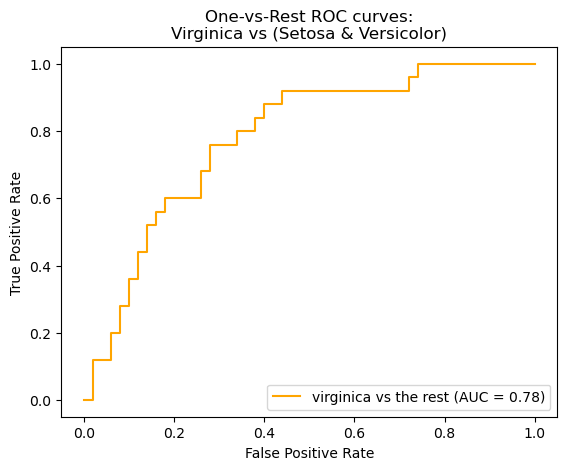

In [120]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="orange",
    # plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

ROC Curve: A graphical plot that illustrates the diagnostic ability of a binary classifier. 
    It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).
    AUC (Area Under the Curve): The area under the ROC curve provides a single scalar value that summarizes the performance of the classifier. AUC=1: indicates perfect performance; AUC=0.5: indicates no discrimination ability (random guessing).

True Positive Rate (Recall, Sensitivity): the proportion of actual positives that are correctly identified by the model TP / (TP + FN)
False Positive Rate: the proportion of actual negative cases that are incorrectly classified as positive by the model FP / (FP + TN)
        
roc_curve(y_true, y_score): Calculates the False Positive Rate and True Positive Rate for different thresholds.
auc(fpr, tpr): Computes the area under the ROC curve.

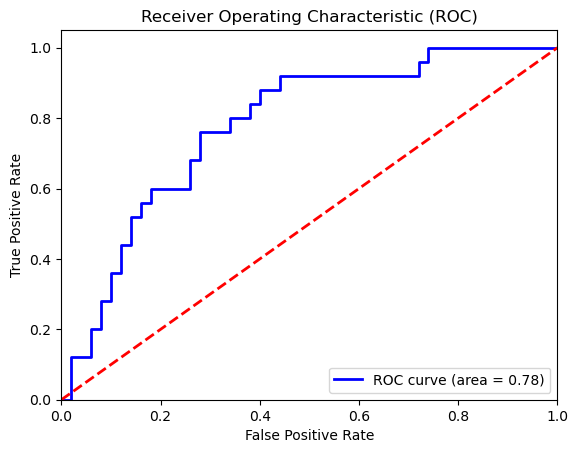

In [153]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_onehot_test[:, class_id], y_score[:, class_id]) # '_' Placeholder for thresholds
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<b>Learning and Validation Curves</b>

In [149]:
# Set random seed for reproducibility
np.random.seed(0)

# Load dataset and shuffle indices
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Perform validation curve
param_range = np.logspace(-6, 6, 2)
train_scores, valid_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=param_range, cv=5
)

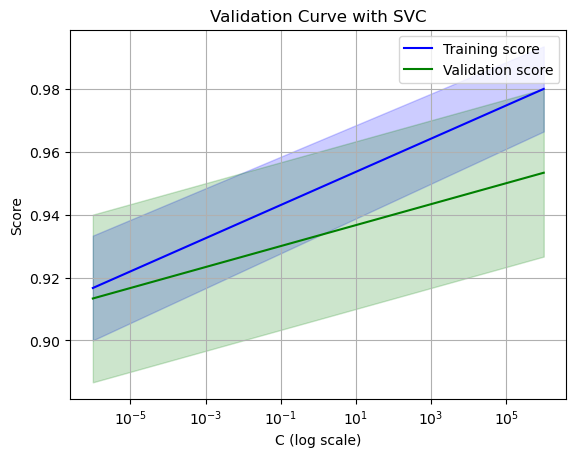

In [150]:
# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure()
plt.semilogx(param_range, train_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.semilogx(param_range, valid_mean, label="Validation score", color="green")
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color="green")

plt.title("Validation Curve with SVC")
plt.xlabel("C (log scale)")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

<b>Cross-validation</b>

In [154]:
pipeline['classifier'].C

1.0

In [159]:
pipeline['classifier'].C = 1000
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-5,
                                                                                               5)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1000))])

In [170]:
GridSearchCV(pipeline, param_grid = {
    "classifier__C": [1, 10, 100], # in pipeline, use double underscore to set a range for the parameters
    "preprocessor__numerical__minmax__feature_range": [(-1, 1), (0, 1), (-6, 6)]
}, cv = 10)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       '...
                                                                         ['admission_type_id',
                                                                          'discharge_disposition_id',
                                                                          'time_in_hospital',
                                                                          'num_lab_procedures',
                                                                          'num_procedures',
                                                                          'num_medications',
                                                                          'number_outpatient',
                                                                          'number_emergency',
                                                                          'number_inpatient',
                                                                          'number_diagnoses'])])),
                                       ('classifier',
                                        LogisticRegression(C=1000))]),
             param_grid={'classifier__C': [1, 10, 100],
                         'preprocessor__numerical__minmax__feature_range': [(-1,
                                                                             1),
                                                                            (0,
                                                                             1),
                                                                            (-6,
                                                                             6)]})

In [171]:
GridSearchCV(pipeline, param_grid = {
    "classifier__C": [1, 10, 100],
    "preprocessor__numerical__minmax__feature_range": [(-1, 1), (0, 1), (-6, 6)]
}, cv = 10).param_grid

{'classifier__C': [1, 10, 100],
 'preprocessor__numerical__minmax__feature_range': [(-1, 1), (0, 1), (-6, 6)]}

In [172]:
# GridSearchCV(pipeline, param_grid = {
#     "classifier__C": [1, 10, 100],
#     "preprocessor__numerical__minmax__feature_range": [(-1, 1), (0, 1), (-2, 2)]
# }, cv = 10).fit(attributes, target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\diton\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\diton\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
  File "C:\Users\diton\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    requests.score =

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       '...
                                                                         ['admission_type_id',
                                                                          'discharge_disposition_id',
                                                                          'time_in_hospital',
                                                                          'num_lab_procedures',
                                                                          'num_procedures',
                                                                          'num_medications',
                                                                          'number_outpatient',
                                                                          'number_emergency',
                                                                          'number_inpatient',
                                                                          'number_diagnoses'])])),
                                       ('classifier',
                                        LogisticRegression(C=1000))]),
             param_grid={'classifier__C': [1, 10, 100],
                         'preprocessor__numerical__minmax__feature_range': [(-1,
                                                                             1),
                                                                            (0,
                                                                             1),
                                                                            (-2,
                                                                             2)]})

In [173]:
search_params_pipeline = GridSearchCV(pipeline, param_grid = {
    "classifier__C": [1, 10, 100],
    "preprocessor__numerical__minmax__feature_range": [(-1, 1), (0, 1), (-2, 2)]
}, cv = 10).fit(attributes, target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\diton\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\diton\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
  File "C:\Users\diton\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    requests.score =

In [174]:
search_params_pipeline

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       '...
                                                                         ['admission_type_id',
                                                                          'discharge_disposition_id',
                                                                          'time_in_hospital',
                                                                          'num_lab_procedures',
                                                                          'num_procedures',
                                                                          'num_medications',
                                                                          'number_outpatient',
                                                                          'number_emergency',
                                                                          'number_inpatient',
                                                                          'number_diagnoses'])])),
                                       ('classifier',
                                        LogisticRegression(C=1000))]),
             param_grid={'classifier__C': [1, 10, 100],
                         'preprocessor__numerical__minmax__feature_range': [(-1,
                                                                             1),
                                                                            (0,
                                                                             1),
                                                                            (-2,
                                                                             2)]})

In [175]:
search_params_pipeline.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pio...
                                                                   FunctionTransformer(func=<function <lambda> at 0x0000023EBAA15440>)),
                                                                  ('minmax',
                                                                   MinMaxScaler(feature_range=(-1,
                                                                                               1)))]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses'])])),
                ('classifier', LogisticRegression(C=1))])

In [177]:
search_params_pipeline.best_params_

{'classifier__C': 1, 'preprocessor__numerical__minmax__feature_range': (-1, 1)}

In [178]:
search_params_pipeline.cv_results_

{'mean_fit_time': array([0.20233803, 0.18986087, 0.19604535, 0.19401541, 0.18781505,
        0.18867652, 0.20190709, 0.19020092, 0.20348268]),
 'std_fit_time': array([0.01760977, 0.0135913 , 0.01026692, 0.00701428, 0.01669961,
        0.0070841 , 0.01481442, 0.01087631, 0.01029162]),
 'mean_score_time': array([0.00203016, 0.00708275, 0.00614922, 0.0031419 , 0.00156331,
        0.00468402, 0.00710204, 0.00677738, 0.00347514]),
 'std_score_time': array([0.00476181, 0.00745528, 0.0075379 , 0.00628381, 0.00468993,
        0.00715496, 0.00738228, 0.00740855, 0.00616156]),
 'param_classifier__C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_preprocessor__numerical__minmax__feature_range': masked_array(data=[(-1, 1), (0, 1), (-2, 2), (-1, 1), (0, 1), (-2, 2),
                    (-1, 1), (0, 1), (-2, 2)],
              m

An alaternative of GridSearchCV is hyperopt.

hyperopt-sklearn -> search parameters based on distributions in the data

Yellobrick -> for visualization; plotting multiple classes

<b>Manipulating features</b>

Reduce the number of features -> simpler model

Feature selection
- Removing irrelevant features
- Regularization 
- Dimensionality reduction

Feature engineering
- Producing new, meaningful features